Capstone 2: Mock Game Analysis - Tom Clancy's The Division 2

For my final project, I wanted to put my analytical skills to the test in a 'real world' scenario as a game analyst for one of my favorite games, Tom Clancy's The Division 2.

The game is an MMO-lite looter shooter with various pieces of gear and weapons, each with it's own set of base stats that improve attributes like weapon damage, skill damage, and player stats. Since there are literally hundreds of different talents and variables at play here, I decided to slim this down into just focusing on weapon damage/balance and gear bonuses/balance.

As we know, the biggest factor that determines a games balance is what players are actually using. Over time, a "meta" begins to form based on the most useful/powerful items, which tends to cause serious imbalances within the game as a whole. The challange, however, is figuring out how to balance everything together in a way that makes every item and combination of gear feel not just viable, but actually fun to use.


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


talent_df = pd.read_csv('talent_details.csv')
wpncls_df = pd.read_csv('weapon_class.csv')
wpndtl_df = pd.read_csv('weapon_details.csv')
wpntlt_df = pd.read_csv('weapon_talents.csv')

,talent_id,talent_slot,talent_name,talent_description,dmg_bonus_type,dmg_bonus
0,1001,backpack,Companion,"While you are within 5 meters of an ally or skill, total weapon damage is increased by 15%.",additive,0.15
1,1002,backpack,Composure,"While in cover, increases total weapon damage by 15%",additive,0.15
2,1003,backpack,Concussion,Headshots increase total weapon damage by 10% for 1.5 seconds. 5 second with marksman rifles.,additive,0.10
3,1005,backpack,Unstoppable Force,Killing an enemy increases total weapon damage by 5% for 15 seconds. Stacks up to 5 times.,additive,0.25
4,1006,backpack,Versatile,Amplifies total weapon damage for 10 seconds when swapping between your primary and secondary weapons if they are different.\n\n35% to enemies within 15 meters for shotguns and SMGs.\n35% to enemies further than 25 meters for rifles and marksman rifles.\n10% ot enemies between 15 and 25 meters for LMGs and assault rifles.\n\nActivates once per 5 seconds for each weapon type.,multiplicative,0.35
5,1007,backpack,Vigilance,Increases total weapon damage by 25%. Taking damage disables the buff for 4 seconds.,additive,0.25


<Axes: title={'center': 'Backpack Talent Damage Bonuses (Percentage)'}, xlabel='talent_name'>

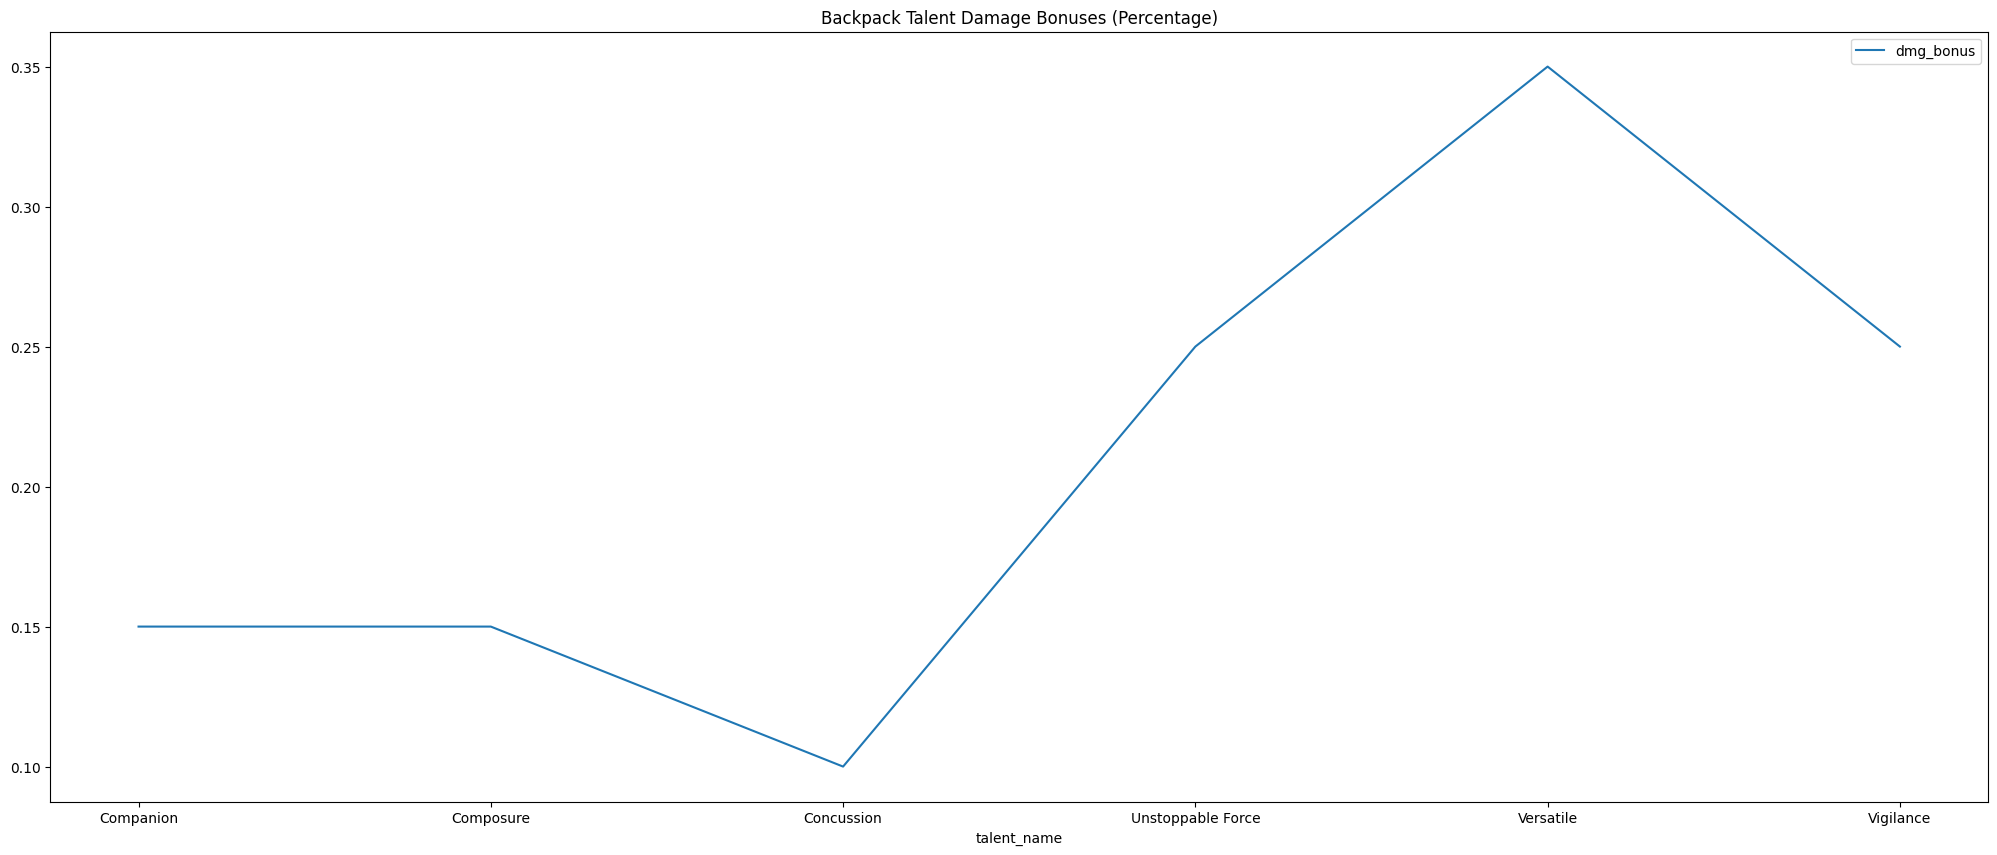

In [156]:
# Compile backpack talents only
pd.set_option('display.max_colwidth', None)
bp_talents = pd.DataFrame(talent_df[(talent_df['talent_slot'] == 'backpack')])
display(bp_talents)

# Line graphing backpack talent damage bonus data
bp_talents.plot(x='talent_name',
               y='dmg_bonus',
               figsize=(25,10),
               kind='line',
               stacked=False,
               title='Backpack Talent Damage Bonuses (Percentage)')



,talent_id,talent_slot,talent_name,talent_description,dmg_bonus_type,dmg_bonus
6,1009,chest,Focus,"Increases total weapon damage by 5% every second you are aiming with an 8x scope or higher, up to 50%.",additive,0.50
7,1010,chest,Glass Cannon,All damage you deal is amplified by 25%. All damage your take is amplified by 50%.,multiplicative,0.25
8,1011,chest,Gunslinger,Weapon swapping increases total weapon damage by 20% for 5 seconds. Buff is lost for 5 seconds if weapon is swapped while buff is active.,additive,0.20
9,1012,chest,Headhunter,"After killing an enemy with a headshot, your next weapon hit within 30 seconds deals an additional 125% of that killing blow's damage. Damage is capped at 800% of your weapon damage. This is raised to 1250% if your headshot damage is greater than 150%.",additive,12.50
10,1013,chest,Obliterate,Critical hits increase total weapon damage by 1% for 5 seconds. Stacks up to 25 times.,additive,0.25
11,1014,chest,Spark,Damaging an enemy with a skill increases total weapon damage by 15% for 15 seconds.,additive,0.15


<Axes: title={'center': 'Chest Talent Damage Bonuses (Percentage)'}, xlabel='talent_name'>

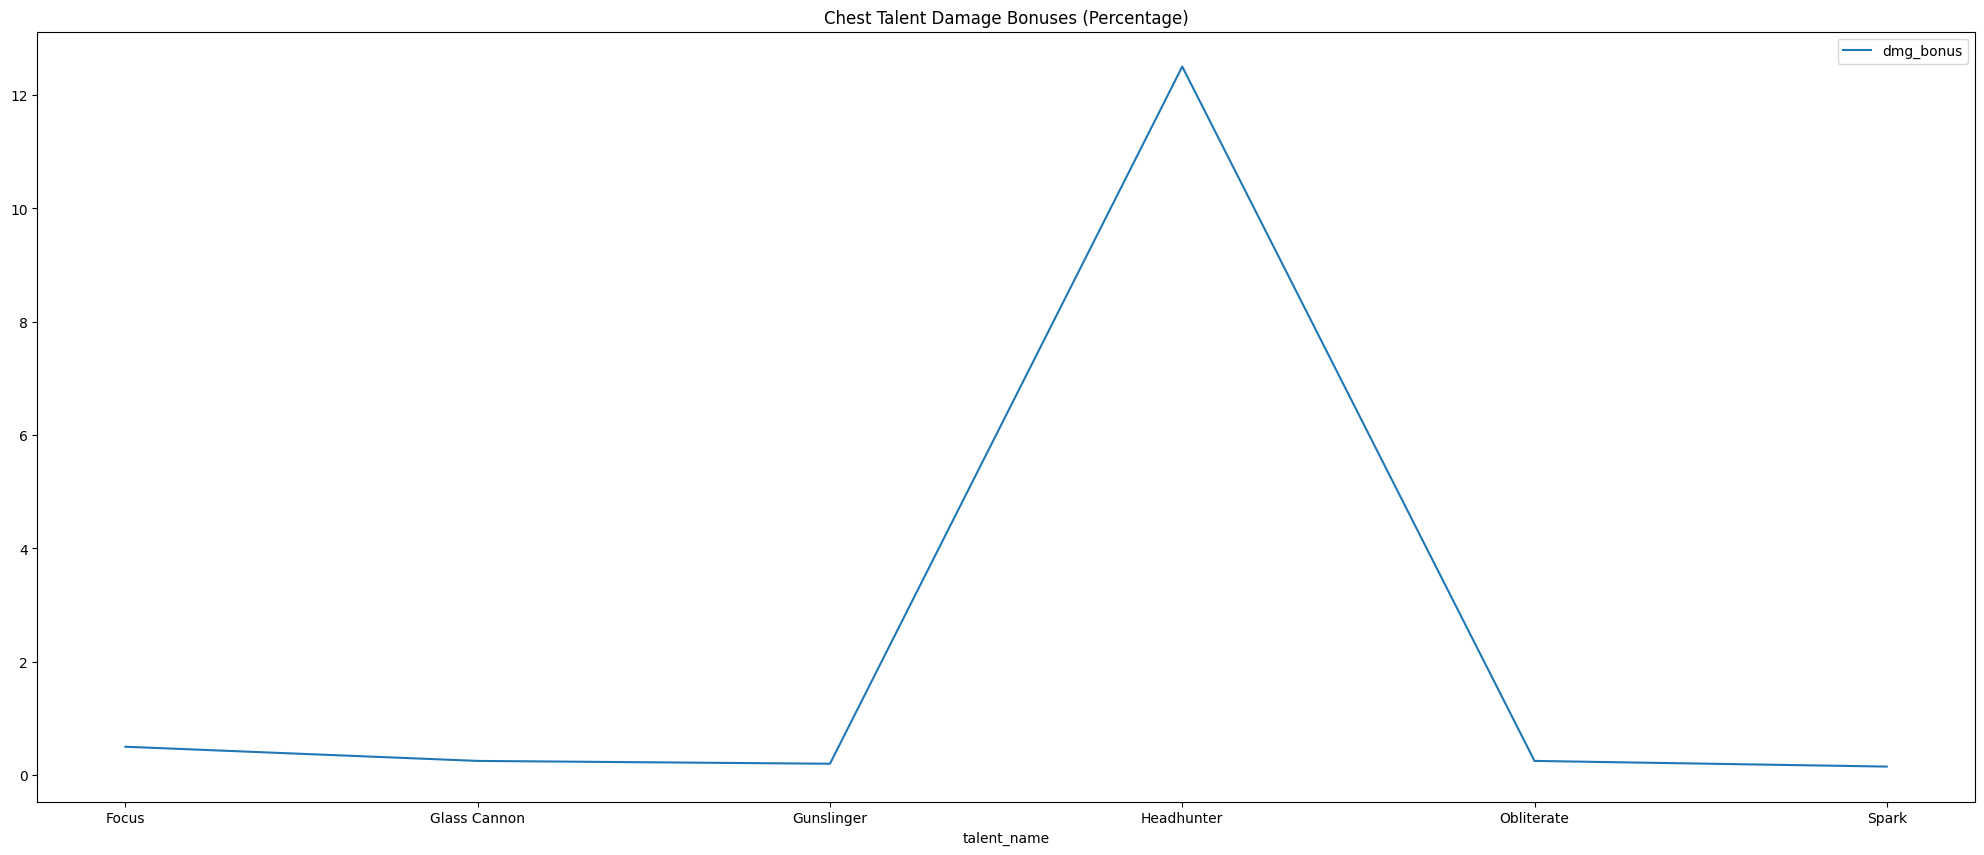

In [155]:
# Compile chest talents only
chst_talents = pd.DataFrame(talent_df[(talent_df['talent_slot'] == 'chest')])
display(chst_talents)

# Line graphing chest talent damage bonus data
chst_talents.plot(x='talent_name',
               y='dmg_bonus',
               figsize=(25,10),
               kind='line',
               stacked=False,
               title='Chest Talent Damage Bonuses (Percentage)')

In regards to talents, there are a few that stand out due to the damage bonuses they provide. However, I feel there is enough of a balance in what is required for the talent to activate to get the damage bonus:

Chest Talents:
- Headhunter: This can provide a huge damage boost of up to 1,250%, but the requirements to activate this bonus are pretty steep, requiring a high level of precision and accuracy from the player to get it.
- Glass Cannon: Since this talent "amplifies" damage (multiplicative), the bonus damage received is much higher than others. However, I belive it's fair since you get this bonus at the cost of amplifying your incoming damage by 50%.

Backpack Talents:
- Versatile: Another amplifying talent, the potential 35% damage increase is huge all things considered. However, to earn it, it requires constant switching of weapons to keep active, and a penalty is incurred if weapons are switched too soon.
- Vigiliance: A flat 25% damage increase is a large boost for essentially not doing anything, but taking damage deactivates the talent for a full 4 seconds. Fair in my book.

Honestly, the talents overall seem fairly balanced and fair in regards to the give and take required for each. Higher damage bonus talents all require more input and skill from the player (accurate shot placement, damage avoidance, etc), while lower damage bonus talents require more basic action (staying in cover, getting a kill, etc).

In [3]:
# Display weapon classifications
display(wpncls_df)

,weapon_class_id,weapon_class_name
0,1,assault_rifle
1,2,smg
2,3,shotgun
3,4,rifle
4,5,marksman_rifle
5,6,lmg
6,7,pistol


For weapon damage statistics, the following formulas were used:

- Potential Damage: base_dmg * (1 + crit_dmg + hs_dmg)
- Total Potential Damage: Potential Damage * mag_cap
- DPS: Potential Damage * rate_of_fire / 60

In [96]:
# Display all AR weapon statistics and barchart damage, dps, etc
wpnstat_asr = pd.DataFrame(wpndtl_df[(wpndtl_df['weapon_class_id'] == 1)])
asr_dmg = pd.DataFrame(wpnstat_asr[['weapon_name','base_dmg','mag_cap','rate_of_fire','crit_chance','crit_dmg','hs_dmg','potential_dmg','total_potential_dmg','dps']])
display(asr_dmg)

,weapon_name,base_dmg,mag_cap,rate_of_fire,crit_chance,crit_dmg,hs_dmg,potential_dmg,total_potential_dmg,dps
0,p416,"47,952",30,750,0.1,0.25,0.55,86313.6,2589408.0,1078920.0
1,famas_2010,"44,191",30,900,0.1,0.25,0.55,79543.8,2386314.0,1193157.0
2,police_m4,"44,191",30,850,0.1,0.25,0.55,79543.8,2386314.0,1126870.5
3,mk16,"55,004",30,625,0.1,0.25,0.55,99007.2,2970216.0,1031325.0
4,f2000,"45,132",30,850,0.1,0.25,0.55,81237.6,2437128.0,1150866.0
5,g36,"48,892",30,750,0.1,0.25,0.55,88005.6,2640168.0,1100070.0


<Axes: title={'center': 'Damage per Second (in million)'}, xlabel='weapon_name'>

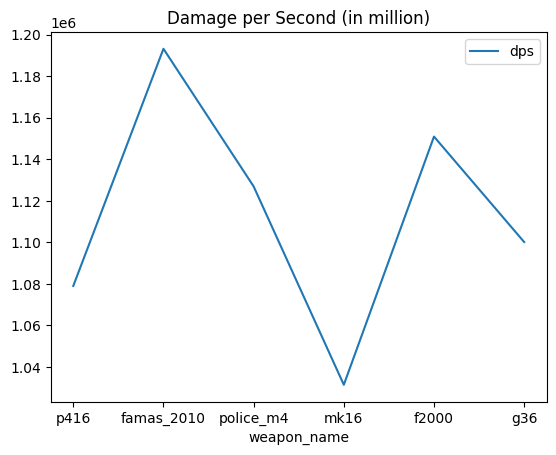

In [103]:
# Line graphing AR dps data
asr_dmg.plot(x='weapon_name',
             y='dps',
             kind='line',
             stacked=False,
             title='Damage per Second (in millions)')

For assault rifles, the spread of damage per second is pretty large at almost 120 million between the famas 2010 and the mk16.

The Famas 2010, which features a faster 900 RPM rate of fire, along with a 44,191 base damage, makes for a powerful weapon. While the Mk16, which is only 4,000 more on base damage, features a much slower 750 RPM rate of fire. While it's total damage output is higher at 2.97 million, it's damage per second isn't nearly as good due to how slow it fires.

I would suggest a much higher base damage, closer to 63,000, which would up the DPS output to around 1.16 million. The Mk16 is easy to handle but fires slow, so giving it about a 13% base damage boost would bring the time to kill more in line with the rest of the assault rifles.

In [97]:
# Display all SMG weapon statistics and barchart damage, dps, etc
wpnstat_smg = pd.DataFrame(wpndtl_df[(wpndtl_df['weapon_class_id'] == 2)])
smg_dmg = pd.DataFrame(wpnstat_smg[['weapon_name','base_dmg','mag_cap','rate_of_fire','crit_chance','crit_dmg','hs_dmg','potential_dmg','total_potential_dmg','dps']])
display(smg_dmg)

,weapon_name,base_dmg,mag_cap,rate_of_fire,crit_chance,crit_dmg,hs_dmg,potential_dmg,total_potential_dmg,dps
6,ump_45,"65,817",30,600,0.25,0.45,0.5,128343.15,3850294.50,1283431.500
7,mp5,"51,713",30,800,0.25,0.45,0.5,100840.35,3025210.50,1344538.000
8,mp7,"47,952",40,950,0.25,0.45,0.5,93506.40,3740256.00,1480518.000
9,vector_9mm,"37,139",33,1200,0.25,0.45,0.5,72421.05,2389894.65,1448421.000
10,aug_a3,"57,825",25,725,0.25,0.45,0.5,112758.75,2818968.75,1362501.563
11,p90,"48,892",50,900,0.25,0.45,0.5,95339.40,4766970.00,1430091.000
12,mpx,"53,124",30,850,0.25,0.45,0.5,103591.80,3107754.00,1467550.500


<Axes: title={'center': 'Damage per Second (in millions)'}, xlabel='weapon_name'>

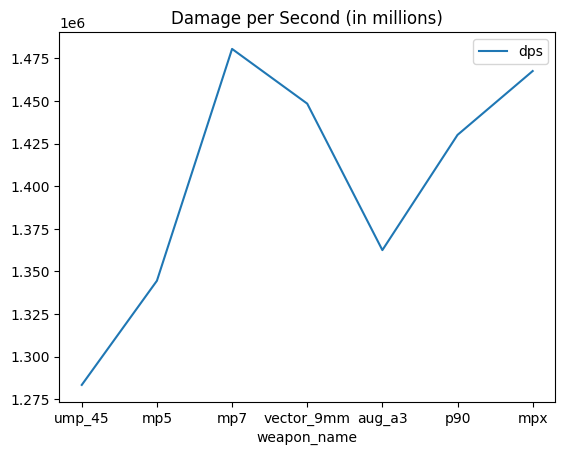

In [104]:
# Line graphing SMG dps data
smg_dmg.plot(x='weapon_name',
             y='dps',
             kind='line',
             stacked=False,
             title='Damage per Second (in millions)')

SMGs fall victim to the same issue as assault rifles, with a DPS spread of about 198 million between the MPX and the UMP 45.

Bringing the UMP 45's base damage to approximately 73,000 would even this out a bit, bringing this slow firing weapon more in line with the rest of the SMG family. Giving it a 10% damage boost would make this weapon feel more like the hard hitting weapon it should be, bringing DPS closer to around 1.45 million, without overshadowing the faster weapons.



In [136]:
# Display all shotgun weapon statistics and barchart damage, dps, etc
wpnstat_stg = pd.DataFrame(wpndtl_df[(wpndtl_df['weapon_class_id'] == 3)])
stg_dmg = pd.DataFrame(wpnstat_stg[['weapon_name','base_dmg','mag_cap','rate_of_fire','crit_chance','crit_dmg','hs_dmg','potential_dmg','total_potential_dmg','dps']])
display(stg_dmg)

,weapon_name,base_dmg,mag_cap,rate_of_fire,crit_chance,crit_dmg,hs_dmg,potential_dmg,total_potential_dmg,dps
13,spas_12,"646,883",8,70,0.1,0.25,0.45,1099701.1,8797608.8,1282984.617
14,m870,"695,775",5,75,0.1,0.25,0.45,1182817.5,5914087.5,1478521.875
15,sasg_12,"364,812",7,180,0.1,0.25,0.45,620180.4,4341262.8,1860541.200
16,super_90,"440,031",8,160,0.1,0.25,0.45,748052.7,5984421.6,1994807.200
17,acs_12,"169,243",20,300,0.1,0.25,0.45,287713.1,5754262.0,1438565.500
18,double_b_so,"620,556",2,200,0.1,0.25,0.45,1054945.2,2109890.4,3516484.000


<Axes: title={'center': 'Potenital Damage per Shot (in millions)'}, xlabel='weapon_name'>

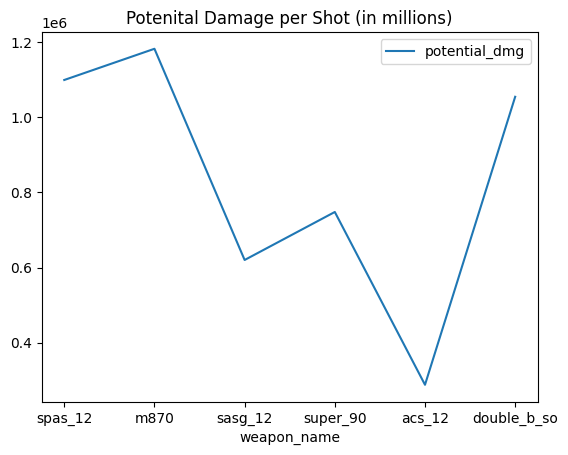

In [168]:
# Line graphing shotgun dps data
stg_dmg.plot(x='weapon_name',
             y='potential_dmg',
             kind='line',
             stacked=False,
             title='Potenital Damage per Shot (in millions)')

While the chart shows a massive spike in DPS for the Double Barrel, this is actually fairly balanced when you consider the number of rounds and rate of fire each shotgun has. These weapons tends to be armor breakers/burst weapons, so it's more important to look at potential damage of each shot rather than DPS in my opinion.

Which is fairly balanced across this weapon class.

In [99]:
# Display all rifle weapon statistics and barchart damage, dps, etc
wpnstat_rfl = pd.DataFrame(wpndtl_df[(wpndtl_df['weapon_class_id'] == 4)])
rfl_dmg = pd.DataFrame(wpnstat_rfl[['weapon_name','base_dmg','mag_cap','rate_of_fire','crit_chance','crit_dmg','hs_dmg','potential_dmg','total_potential_dmg','dps']])
display(rfl_dmg)

,weapon_name,base_dmg,mag_cap,rate_of_fire,crit_chance,crit_dmg,hs_dmg,potential_dmg,total_potential_dmg,dps
19,acr_ss,"92,614",30,420,0.15,0.5,0.6,194489.4,5834682.0,1361425.8
20,lova_c,"100,136",30,380,0.15,0.5,0.6,210285.6,6308568.0,1331808.8
21,lightweight_m4,"103,897",30,360,0.15,0.5,0.6,218183.7,6545511.0,1309102.2
22,m1a_cqb,156080,10,320,0.15,0.5,0.6,327768.0,3277680.0,1748096.0
23,m16a2,75219,30,400,0.15,0.5,0.6,157959.9,4738797.0,1053066.0
24,mk17,116120,20,275,0.15,0.5,0.6,243852.0,4877040.0,1117655.0


<Axes: title={'center': 'Potential Damage per Shot (in millions)'}, xlabel='weapon_name'>

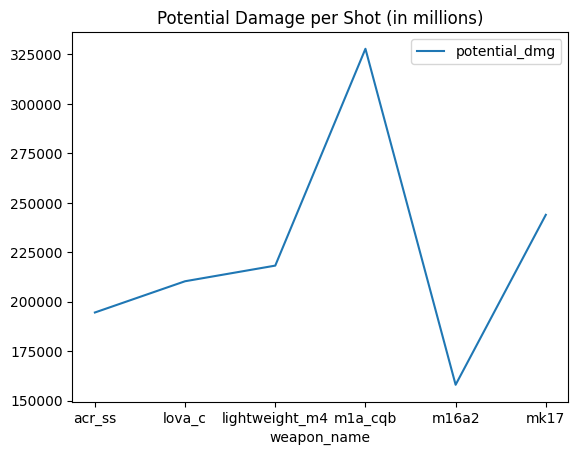

In [167]:
# Line graphing rifle dps data
rfl_dmg.plot(x='weapon_name',
             y='potential_dmg',
             kind='line',
             stacked=False,
             title='Potential Damage per Shot (in millions)')

Another weapon class that I feel is pretty fair as well. Rifles are single fire shot weapons, and I feel should be looked at similarly to shotguns. While they can be rapid fired, the amount of rounds in a magazine and the potential damage play a bigger factor in determining balance in this weapon class.

The one exception would be the M16A2, which is a 3-round burst rifle. While the DPS is lower by a large margin compared to the rest of the rifles, the fact that this weapon is much more managable and fires faster than the rest makes for a fair trade.

In [100]:
# Display all MMR weapon statistics and barchart damage, dps, etc
wpnstat_mmr = pd.DataFrame(wpndtl_df[(wpndtl_df['weapon_class_id'] == 5)])
mmr_dmg = pd.DataFrame(wpnstat_mmr[['weapon_name','base_dmg','mag_cap','rate_of_fire','crit_chance','crit_dmg','hs_dmg','potential_dmg','total_potential_dmg','dps']])
display(mmr_dmg)

,weapon_name,base_dmg,mag_cap,rate_of_fire,crit_chance,crit_dmg,hs_dmg,potential_dmg,total_potential_dmg,dps
25,m44,423108,5,55,0.5,0.2,1.11,977379.48,4886897.40,895931.190
26,srs,338957,7,60,0.5,0.2,1.11,782990.67,5480934.69,782990.670
27,m700,376096,7,54,0.5,0.2,1.11,868781.76,6081472.32,781903.584
28,sr_1,357291,5,60,0.5,0.2,1.11,825342.21,4126711.05,825342.210
29,socom_mk20,143857,20,275,0.5,0.2,1.11,332309.67,6646193.40,1523085.988
30,g28,146677,20,275,0.5,0.2,1.11,338823.87,6776477.40,1552942.738


<Axes: title={'center': 'Potential Damage per Shot (in millions)'}, xlabel='weapon_name'>

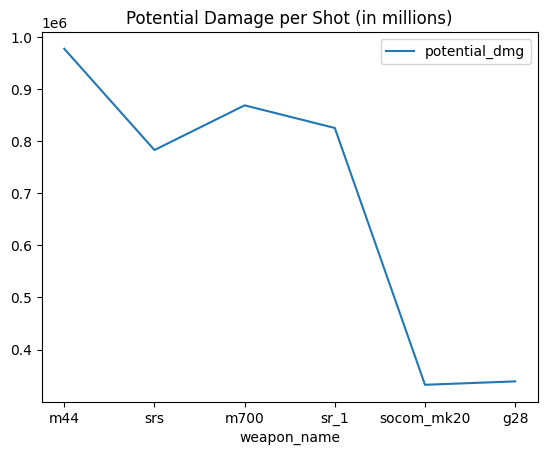

In [166]:
# Line graphing MMR dps data
mmr_dmg.plot(x='weapon_name',
             y='potential_dmg',
             kind='line',
             stacked=False,
             title='Potential Damage per Shot (in millions)')

Marksman Rifles (snipers) should also be looked at by potential damage/base damage, not by DPS. Not only do these fire substantially slower than all other weapons, a big part of what determines DPS is how accurate the player is when using them. Thus, I don't feel DPS is a true measurement of how well these weapons can perform.

The SR-1, however, is quite weak compared to it's similar counterpart, the M44, which punches out 6,000 more damage per shot and features a rate of fire that is only 5 greater. It should peform more closely to the M44, and I would recommend upping the damage to around 400,000 base damage.

This would bring it's total potential damage to around 4,620,000, which would help differentiate it from the M44 while still offering a sizable damage boost.

In [159]:
# Display all LMG weapon statistics and barchart damage, dps, etc
wpnstat_lmg = pd.DataFrame(wpndtl_df[(wpndtl_df['weapon_class_id'] == 6)])
lmg_dmg = pd.DataFrame(wpnstat_lmg[['weapon_name','base_dmg','mag_cap','rate_of_fire','crit_chance','crit_dmg','hs_dmg','potential_dmg','total_potential_dmg','dps']])
display(lmg_dmg)

,weapon_name,base_dmg,mag_cap,rate_of_fire,crit_chance,crit_dmg,hs_dmg,potential_dmg,total_potential_dmg,dps
31,l86_lsw,59705,30,610,0.5,0.35,0.65,119410.0,3582300.0,1214001.667
32,m60,63466,100,500,0.5,0.35,0.65,126932.0,12693200.0,1057766.667
33,rpk_74,55474,45,650,0.5,0.35,0.65,110948.0,4992660.0,1201936.667
34,m249_b,56414,100,550,0.5,0.35,0.65,112828.0,11282800.0,1034256.667
35,mg5,44661,50,800,0.5,0.35,0.65,89322.0,4466100.0,1190960.000
36,gr9,39960,200,750,0.5,0.35,0.65,79920.0,15984000.0,999000.000


<Axes: title={'center': 'Damage per Second (in millions)'}, xlabel='weapon_name'>

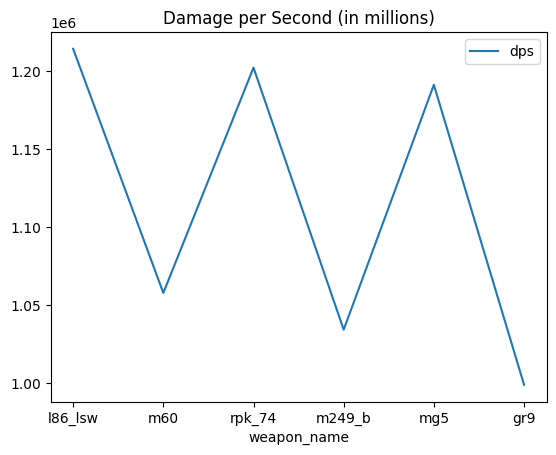

In [165]:
# Line graphing LMG dps data
lmg_dmg.plot(x='weapon_name',
            y='dps',
            kind='line',
            stacked=False,
            title='Damage per Second (in millions)')


This is another weapon class that I think is actually fairly balanced. LMG's can have upwardds of 100 rounds per magazine, so total potential damage can vary wildly between each weapon. So, DPS is a much bigger factor in determining how well an LMG performs.

The spread is large, with the GR9 a just under 1 million and the L86 LSW at just over 120 million, but considering that the GR9 comes with 200 rounds to start, that trade off is more than fair.

In [101]:
# Display all pistol weapon statistics and barchart damage, dps, etc
wpnstat_pst = pd.DataFrame(wpndtl_df[(wpndtl_df['weapon_class_id'] == 7)])
pst_dmg = pd.DataFrame(wpnstat_pst[['weapon_name','base_dmg','mag_cap','rate_of_fire','crit_chance','crit_dmg','hs_dmg','potential_dmg','total_potential_dmg','dps']])
display(pst_dmg)

,weapon_name,base_dmg,mag_cap,rate_of_fire,crit_chance,crit_dmg,hs_dmg,potential_dmg,total_potential_dmg,dps
37,686_magnum,190399,6,160,0.1,0.25,1.0,428397.75,2570386.50,1142394.000
38,m1911,101076,7,310,0.1,0.25,1.0,227421.00,1591947.00,1175008.500
39,m9,81801,15,350,0.1,0.25,1.0,184052.25,2760783.75,1073638.125
40,pf45,79920,15,370,0.1,0.25,1.0,179820.00,2697300.00,1108890.000
41,px4_storm,79920,17,380,0.1,0.25,1.0,179820.00,3056940.00,1138860.000
42,x_45,76630,15,400,0.1,0.25,1.0,172417.50,2586262.50,1149450.000


<Axes: title={'center': 'Potential Damage Per Shot (in millions)'}, xlabel='weapon_name'>

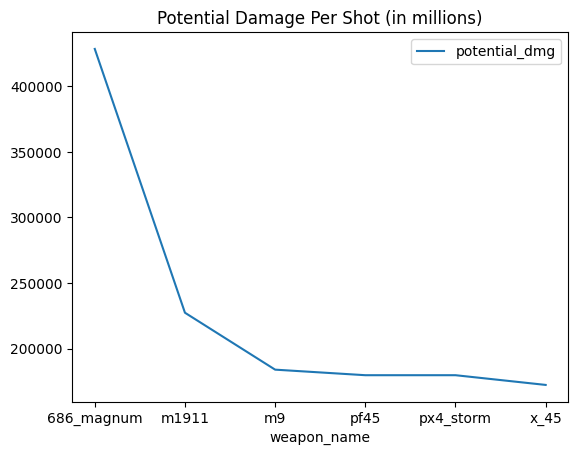

In [162]:
# Line graphing pistol dps data
pst_dmg.plot(x='weapon_name',
             y='potential_dmg',
             kind='line',
             stacked=False,
             title='Potential Damage Per Shot (in millions)')

Pistols should also be looked at by base damage and potential damage, since these weapons aren't always fired in rapid succession. They are semi automatic in most cases, but in most cases, the are used as last resort weapons. We want these to punch hard per each shot, and be used to finish off enemies.

